In [1]:
import pandas as pd

In [2]:
file_path = '../Data/cleaned_sales_data.csv'
df = pd.read_csv(file_path)
print(df.head())

   OrderID Region   Product  Quantity  Price  TotalSale  Profit SaleLevel  \
0     1001  North  Keyboard        10     50        500   100.0       Low   
1     1002  South     Mouse         5     30        150    30.0       Low   
2     1003   East   Monitor        12    200       2400   480.0      High   
3     1004  North     Mouse         7     30        210    42.0       Low   
4     1005   West  Keyboard        15     50        750   150.0      High   

   DiscountedPrice    Category   OrderDate  Order_Month Month_Name  
0             45.0      Typing  2024-08-22            8        Aug  
1             27.0      Screen  2024-09-15            9        Sep  
2            180.0  Controller  2024-01-18            1        Jan  
3             27.0      Typing  2024-12-15           12        Dec  
4             45.0  Controller  2024-08-09            8        Aug  


In [3]:
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6 entries, 0 to 5
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   OrderID          6 non-null      int64  
 1   Region           6 non-null      object 
 2   Product          6 non-null      object 
 3   Quantity         6 non-null      int64  
 4   Price            6 non-null      int64  
 5   TotalSale        6 non-null      int64  
 6   Profit           6 non-null      float64
 7   SaleLevel        6 non-null      object 
 8   DiscountedPrice  6 non-null      float64
 9   Category         6 non-null      object 
 10  OrderDate        6 non-null      object 
 11  Order_Month      6 non-null      int64  
 12  Month_Name       6 non-null      object 
dtypes: float64(2), int64(5), object(6)
memory usage: 756.0+ bytes


,OrderID,Quantity,Price,TotalSale,Profit,DiscountedPrice,Order_Month
count,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000
mean,1003.500000,9.166667,93.333333,868.333333,173.666667,84.000000,8.166667
std,1.870829,3.868678,83.106358,843.218042,168.643608,74.795722,3.868678
min,1001.000000,5.000000,30.000000,150.000000,30.000000,27.000000,1.000000
25%,1002.250000,6.250000,35.000000,282.500000,56.500000,31.500000,8.000000
50%,1003.500000,8.500000,50.000000,625.000000,125.000000,45.000000,8.500000
75%,1004.750000,11.500000,162.500000,1087.500000,217.500000,146.250000,10.500000
max,1006.000000,15.000000,200.000000,2400.000000,480.000000,180.000000,12.000000


In [4]:
print("Missing values:\n", df.isnull().sum())
print("Duplicate rows:", df.duplicated().sum())

Missing values:
 OrderID            0
Region             0
Product            0
Quantity           0
Price              0
TotalSale          0
Profit             0
SaleLevel          0
DiscountedPrice    0
Category           0
OrderDate          0
Order_Month        0
Month_Name         0
dtype: int64
Duplicate rows: 0


In [6]:
#top_region_by_sale
df.groupby('Region')['TotalSale'].sum().sort_values(ascending=False)

Region
East     2400
South    1350
West      750
North     710
Name: TotalSale, dtype: int64

In [7]:
#most_profitable_product
df.groupby('Product')['Profit'].sum().sort_values(ascending=False)

Product
Monitor     720.0
Keyboard    250.0
Mouse        72.0
Name: Profit, dtype: float64

In [8]:
#average_sale_by_month
df.groupby('Month_Name')['TotalSale'].mean()

Month_Name
Aug     625.0
Dec     210.0
Jan    2400.0
Nov    1200.0
Sep     150.0
Name: TotalSale, dtype: float64

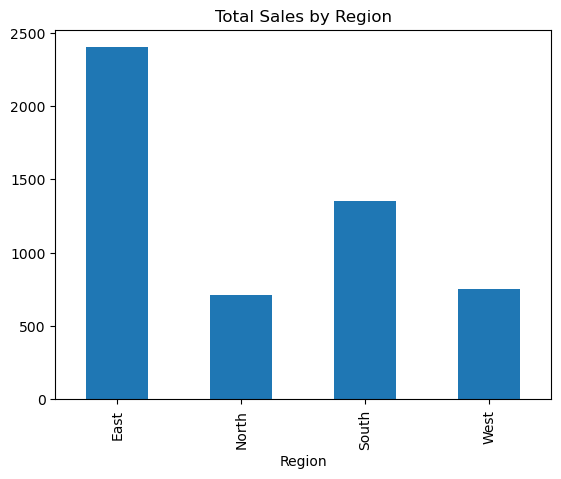

In [9]:
#Visualization
import matplotlib.pyplot as plt

df.groupby('Region')['TotalSale'].sum().plot(kind='bar', title='Total Sales by Region')
plt.show()

In [10]:
# KPI Metrics 
total_sales = df['TotalSale'].sum()
total_profit = df['Profit'].sum()
average_profit_margin = (total_profit / total_sales) * 100
total_quantity_sold = df['Quantity'].sum()

print("📊 KPI Dashboard")
print("----------------------------")
print(f"Total Sales: RM{total_sales:,.2f}")
print(f"Total Profit: RM{total_profit:,.2f}")
print(f"Average Profit Margin: {average_profit_margin:.2f}%")
print(f"Total Quantity Sold: {total_quantity_sold}")

📊 KPI Dashboard
----------------------------
Total Sales: RM5,210.00
Total Profit: RM1,042.00
Average Profit Margin: 20.00%
Total Quantity Sold: 55


In [11]:
# Summary by Product
summary = df.groupby('Product').agg({
    'Quantity': 'sum',
    'TotalSale': 'sum',
    'Profit': 'sum'
}).reset_index()

summary.to_csv('product_summary.csv', index=False)
summary

,Product,Quantity,TotalSale,Profit
0,Keyboard,25,1250,250.0
1,Monitor,18,3600,720.0
2,Mouse,12,360,72.0


In [12]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="whitegrid", palette="pastel")

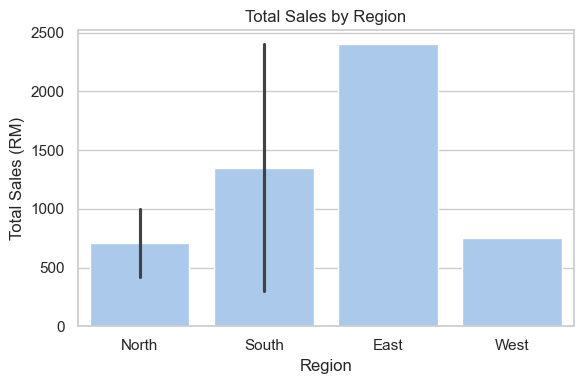

In [13]:
#totalsales_by_region_bar
plt.figure(figsize=(6,4))
sns.barplot(x='Region', y='TotalSale', data=df, estimator=sum)
plt.title("Total Sales by Region")
plt.xlabel("Region")
plt.ylabel("Total Sales (RM)")
plt.tight_layout()
plt.show()

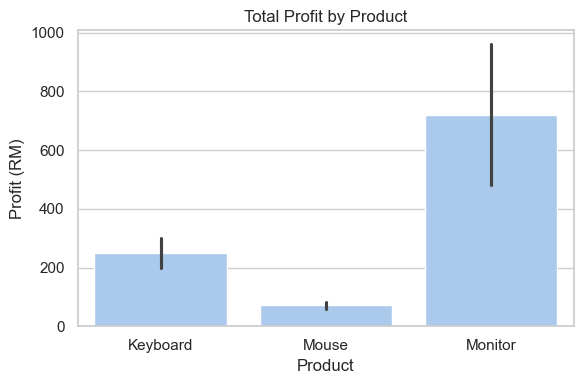

In [14]:
#total_profit_by_product_bar
plt.figure(figsize=(6,4))
sns.barplot(x='Product', y='Profit', data=df, estimator=sum)
plt.title("Total Profit by Product")
plt.xlabel("Product")
plt.ylabel("Profit (RM)")
plt.tight_layout()
plt.show()


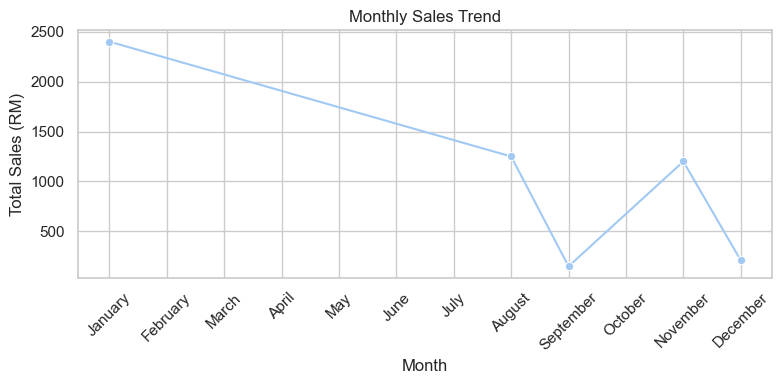

In [17]:
import calendar

# Ensure month names are in correct order
month_order = list(calendar.month_name[1:])
# Convert 'Month' to an ordered categorical type
monthly_sales['Month'] = pd.Categorical(monthly_sales['Month'], categories=month_order, ordered=True)
# Sort data by month order
monthly_sales = monthly_sales.sort_values('Month')

# Plot again
plt.figure(figsize=(8,4))
sns.lineplot(x='Month', y='TotalSale', data=monthly_sales, marker='o')
plt.title("Monthly Sales Trend")
plt.xlabel("Month")
plt.ylabel("Total Sales (RM)")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

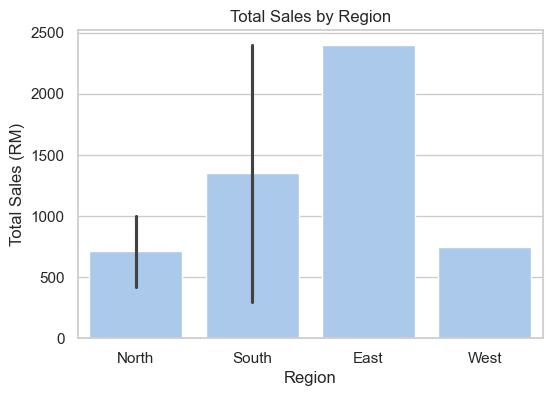

In [18]:
# Total Sales by Region
plt.figure(figsize=(6,4))
sns.barplot(x='Region', y='TotalSale', data=df, estimator=sum)
plt.title("Total Sales by Region")
plt.xlabel("Region")
plt.ylabel("Total Sales (RM)")
plt.show()

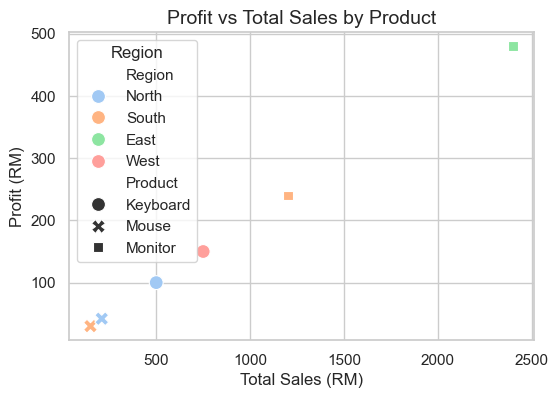

In [20]:
# Profit vs Total Sales
plt.figure(figsize=(6,4))
sns.scatterplot(x='TotalSale', y='Profit', hue='Region', style='Product', s=100, data=df)
plt.title("Profit vs Total Sales by Product", fontsize=14)
plt.xlabel("Total Sales (RM)")
plt.ylabel("Profit (RM)")
plt.legend(title="Region")
plt.show()

C:\Users\User\AppData\Local\Temp\ipykernel_11668\3408797356.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Product', y='TotalSale', data=top_products, palette='viridis')


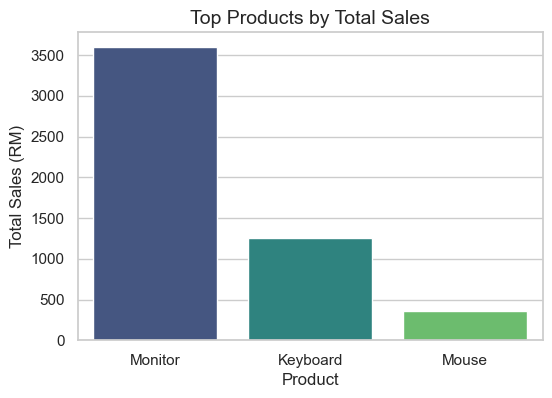

In [21]:
# Top Products by Total Sales
top_products = df.groupby('Product')['TotalSale'].sum().reset_index().sort_values(by='TotalSale', ascending=False)

plt.figure(figsize=(6,4))
sns.barplot(x='Product', y='TotalSale', data=top_products, palette='viridis')
plt.title("Top Products by Total Sales", fontsize=14)
plt.xlabel("Product")
plt.ylabel("Total Sales (RM)")
plt.show()

C:\Users\User\AppData\Local\Temp\ipykernel_11668\34244688.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(ax=axs[0], x='Region', y='TotalSale', data=df, estimator=sum, palette='cool')
C:\Users\User\AppData\Local\Temp\ipykernel_11668\34244688.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(ax=axs[2], x='Product', y='TotalSale', data=top_products, palette='viridis')


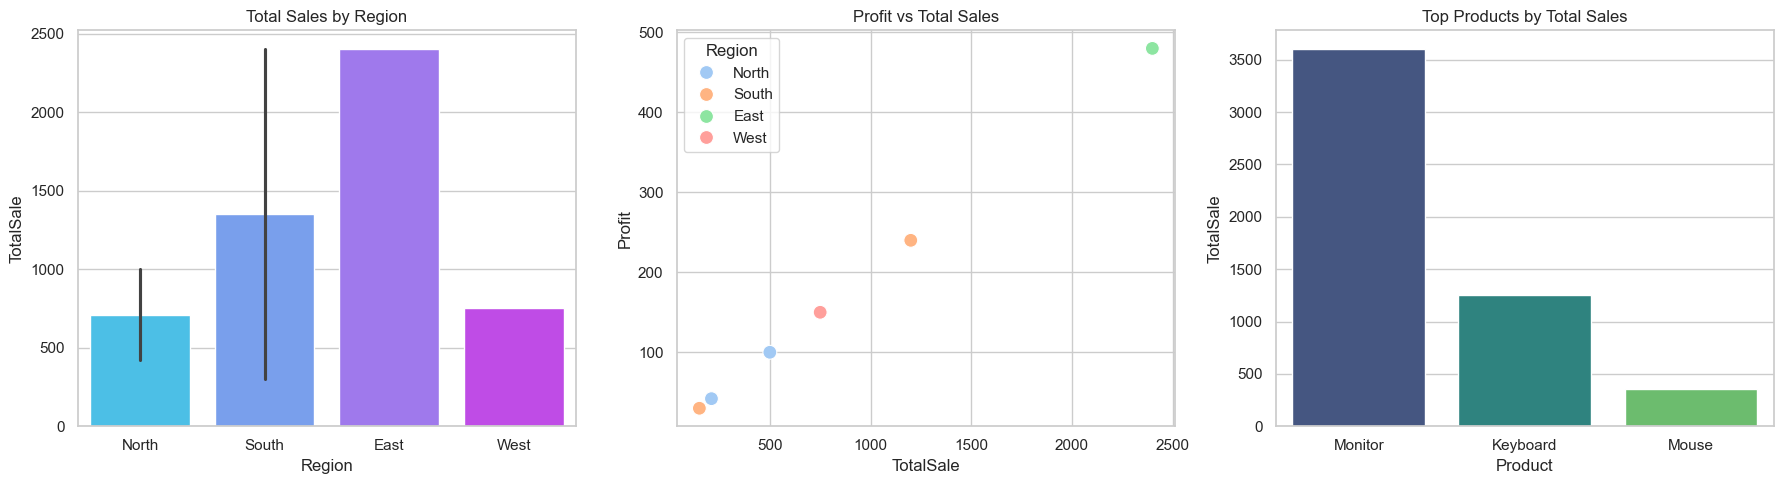

In [22]:
fig, axs = plt.subplots(1, 3, figsize=(18,5))

# 1. Total Sales by Region
sns.barplot(ax=axs[0], x='Region', y='TotalSale', data=df, estimator=sum, palette='cool')
axs[0].set_title("Total Sales by Region")

# 2. Profit vs Total Sales
sns.scatterplot(ax=axs[1], x='TotalSale', y='Profit', hue='Region', data=df, s=100)
axs[1].set_title("Profit vs Total Sales")

# 3. Top Products
sns.barplot(ax=axs[2], x='Product', y='TotalSale', data=top_products, palette='viridis')
axs[2].set_title("Top Products by Total Sales")

plt.tight_layout()
plt.show()

In [19]:
summary = {
    'Total Sales (RM)': df['TotalSale'].sum(),
    'Total Profit (RM)': df['Profit'].sum(),
    'Average Sale per Order (RM)': df['TotalSale'].mean()
}
print(summary)

{'Total Sales (RM)': np.int64(5210), 'Total Profit (RM)': np.float64(1042.0), 'Average Sale per Order (RM)': np.float64(868.3333333333334)}
